In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt



In [2]:
# Load the dataset
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
imputer = SimpleImputer(missing_values=0, strategy='median')
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_prob = model.predict(X_test)



Confusion Matrix:
[[125  26]
 [ 33  47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



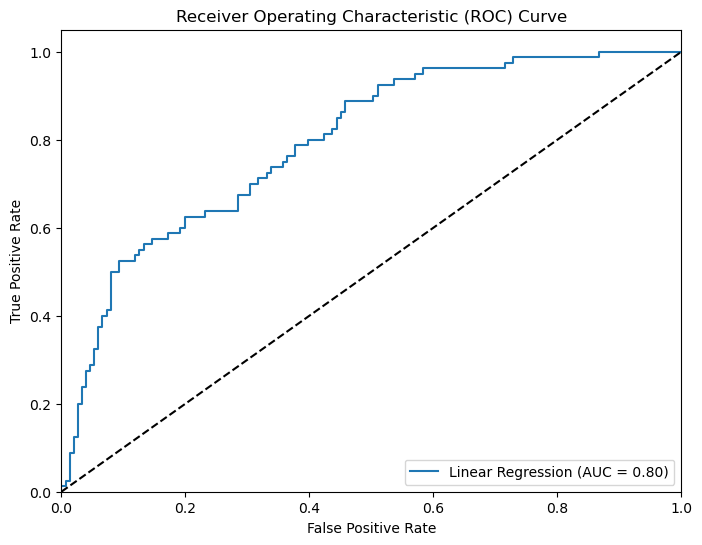

     Actual  Predicted  Predicted Probability
668       0          0               0.307625
324       0          0               0.239595
624       0          0               0.146942
690       0          0               0.182229
473       0          0               0.494748
204       0          0               0.443844
97        0          0              -0.243249
336       0          0               0.389738
568       0          1               0.566025
148       0          1               0.706996


In [4]:

threshold = 0.5
y_pred = (y_pred_prob >= threshold).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Linear Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Predicted Probability': y_pred_prob
})
print(predictions_df.head(10))


In [5]:
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
imputer = SimpleImputer(missing_values=0, strategy='median')
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)[:, 1]

predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Predicted Probability': y_pred_prob
})

print(predictions_df.head(10))


     Actual  Predicted  Predicted Probability
668       0          1                    0.8
324       0          0                    0.4
624       0          0                    0.0
690       0          1                    0.8
473       0          1                    0.8
204       0          1                    0.6
97        0          0                    0.0
336       0          0                    0.4
568       0          1                    0.6
148       0          0                    0.2


Confusion Matrix:
[[112  39]
 [ 29  51]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       151
           1       0.57      0.64      0.60        80

    accuracy                           0.71       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.71      0.71       231



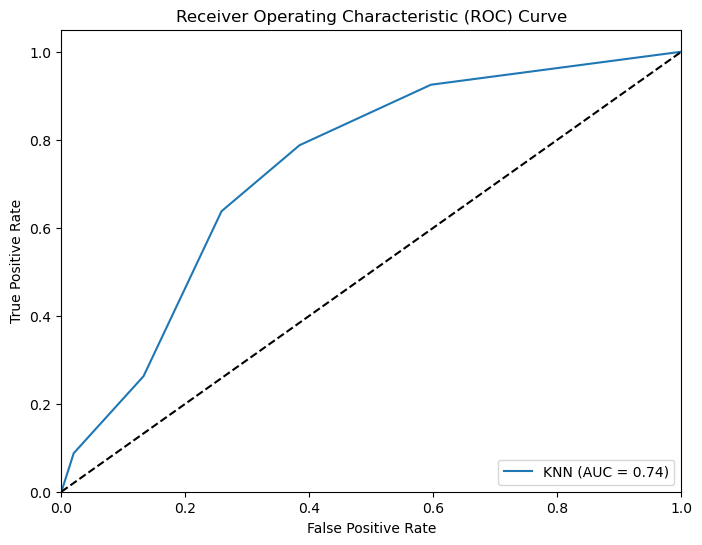

In [6]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [7]:
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
imputer = SimpleImputer(missing_values=0, strategy='median')
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Predicted Probability': y_pred_prob
})

print(predictions_df.head(10))



     Actual  Predicted  Predicted Probability
668       0          0               0.256716
324       0          0               0.181791
624       0          0               0.109312
690       0          0               0.128438
473       0          0               0.486008
204       0          0               0.439591
97        0          0               0.010843
336       0          0               0.350459
568       0          1               0.594535
148       0          1               0.776620


Confusion Matrix:
[[124  27]
 [ 33  47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



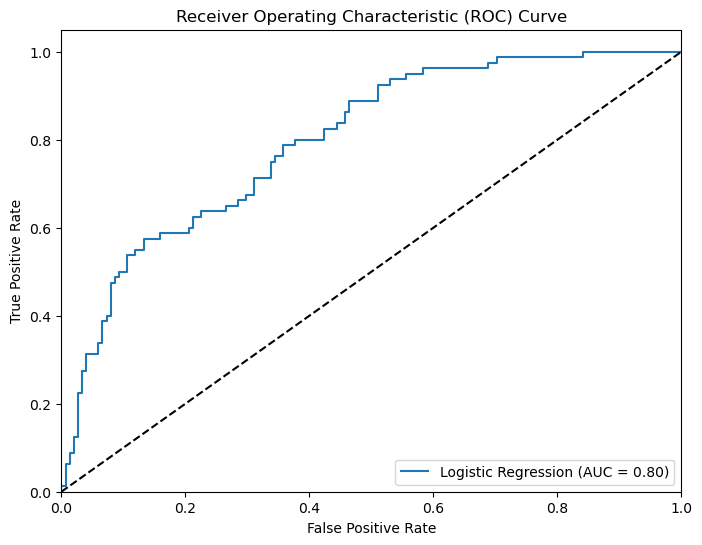

In [8]:

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



In [9]:
# Load the dataset
# Replace zero values in specific columns with the median of those columns
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
imputer = SimpleImputer(missing_values=0, strategy='median')
data[columns_to_impute] = imputer.fit_transform(data[columns_to_impute])

# Split the dataset into features (X) and target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
# Train a KNN model
knn = KNeighborsClassifier(n_neighbors=5)  # Adjust n_neighbors as needed
knn.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

# Evaluate KNN
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Generate and Plot the ROC curve for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       151
           1       0.57      0.64      0.60        80

    accuracy                           0.71       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.71      0.71       231



In [11]:
# Train a Logistic Regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predict the outcomes on the test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]

# Evaluate Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Generate and Plot the ROC curve for Logistic Regression
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_prob_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



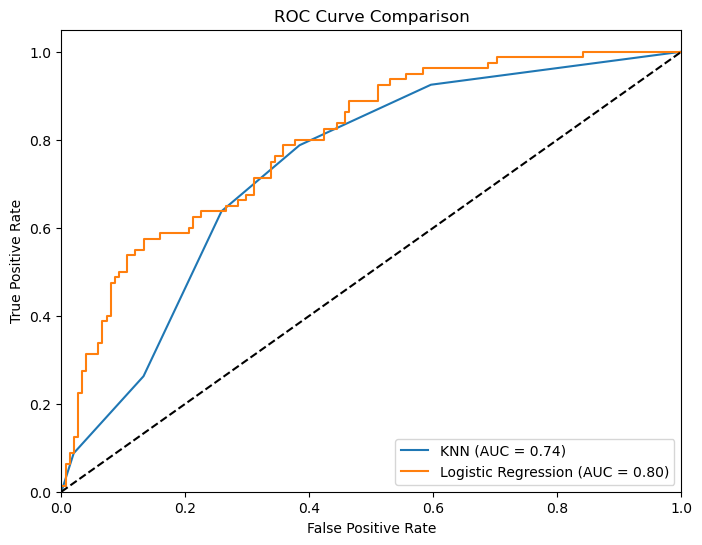

In [12]:
# Plot ROC curves for comparison
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()


In [13]:
# Show the first 10 predictions alongside the actual outcomes for KNN
predictions_df_knn = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_knn,
    'Predicted Probability': y_pred_prob_knn
})

print(predictions_df_knn.head(10))


     Actual  Predicted  Predicted Probability
668       0          1                    0.8
324       0          0                    0.4
624       0          0                    0.0
690       0          1                    0.8
473       0          1                    0.8
204       0          1                    0.6
97        0          0                    0.0
336       0          0                    0.4
568       0          1                    0.6
148       0          0                    0.2
